In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W tym notatniku skupimy się na klasyfikacji metodą **SVM**.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

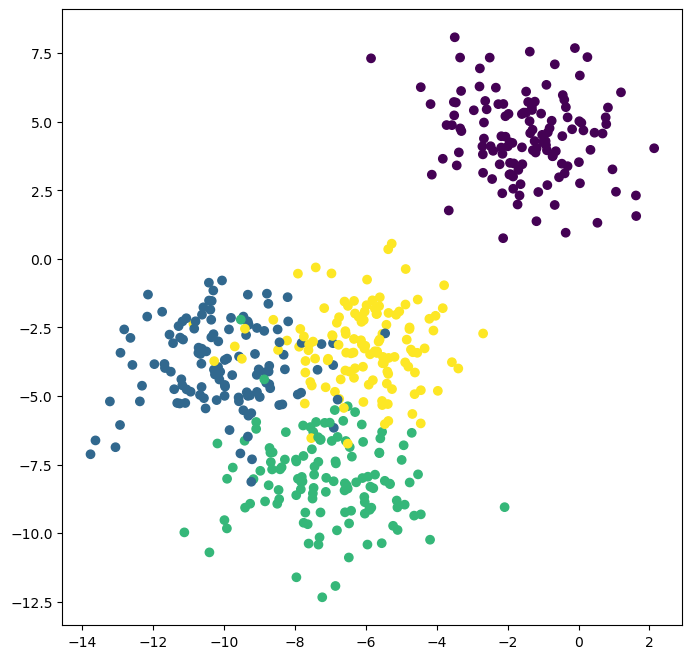

In [3]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)
plt.show()

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder radialnych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder radialnych, uważając na przeuczenie klasyfikatora.   

C = 1/LAMBDA

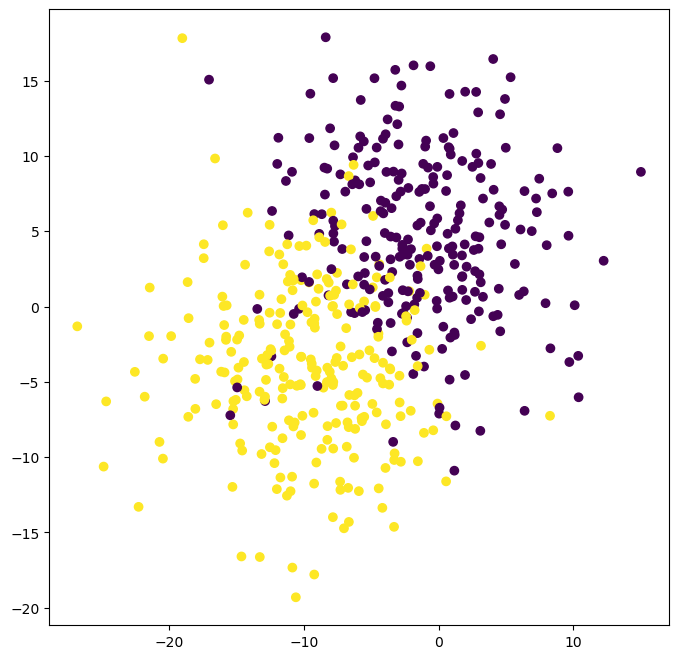

,feature1,feature2,label
0,-10.785289,1.728062,1
1,-6.342566,9.911338,0
2,-14.431693,-3.683509,1
3,10.389289,-6.023495,0
4,-4.118290,-5.106990,1
...,...,...,...
495,-13.098551,-3.460073,1
496,-3.288403,-10.189205,1
497,-10.095709,-7.254112,1
498,-6.396800,8.117403,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)
plt.show()

dane3

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


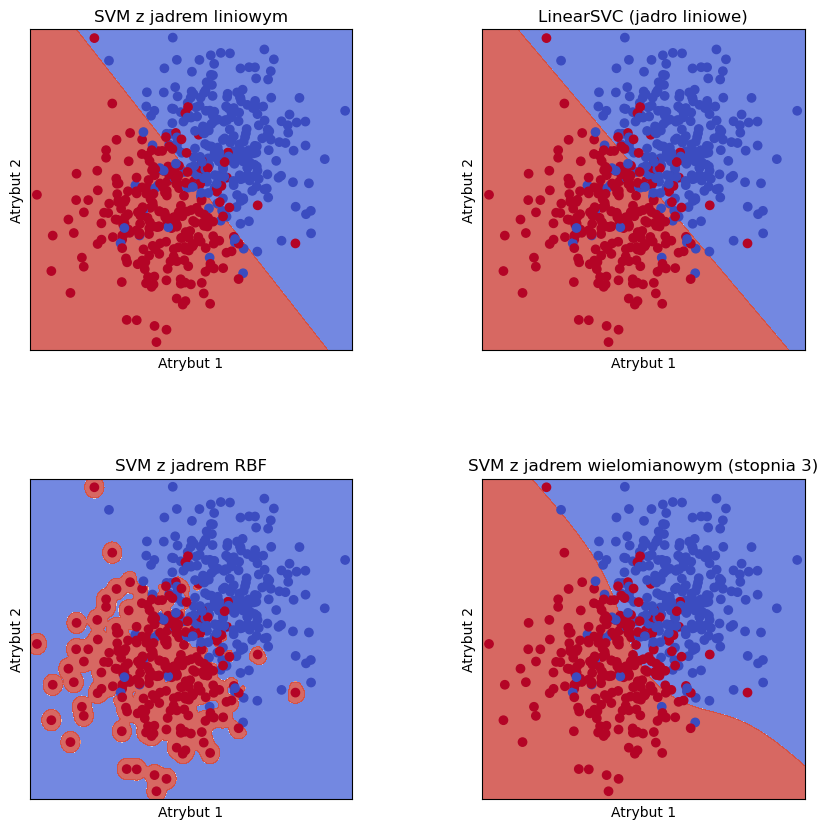

In [7]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

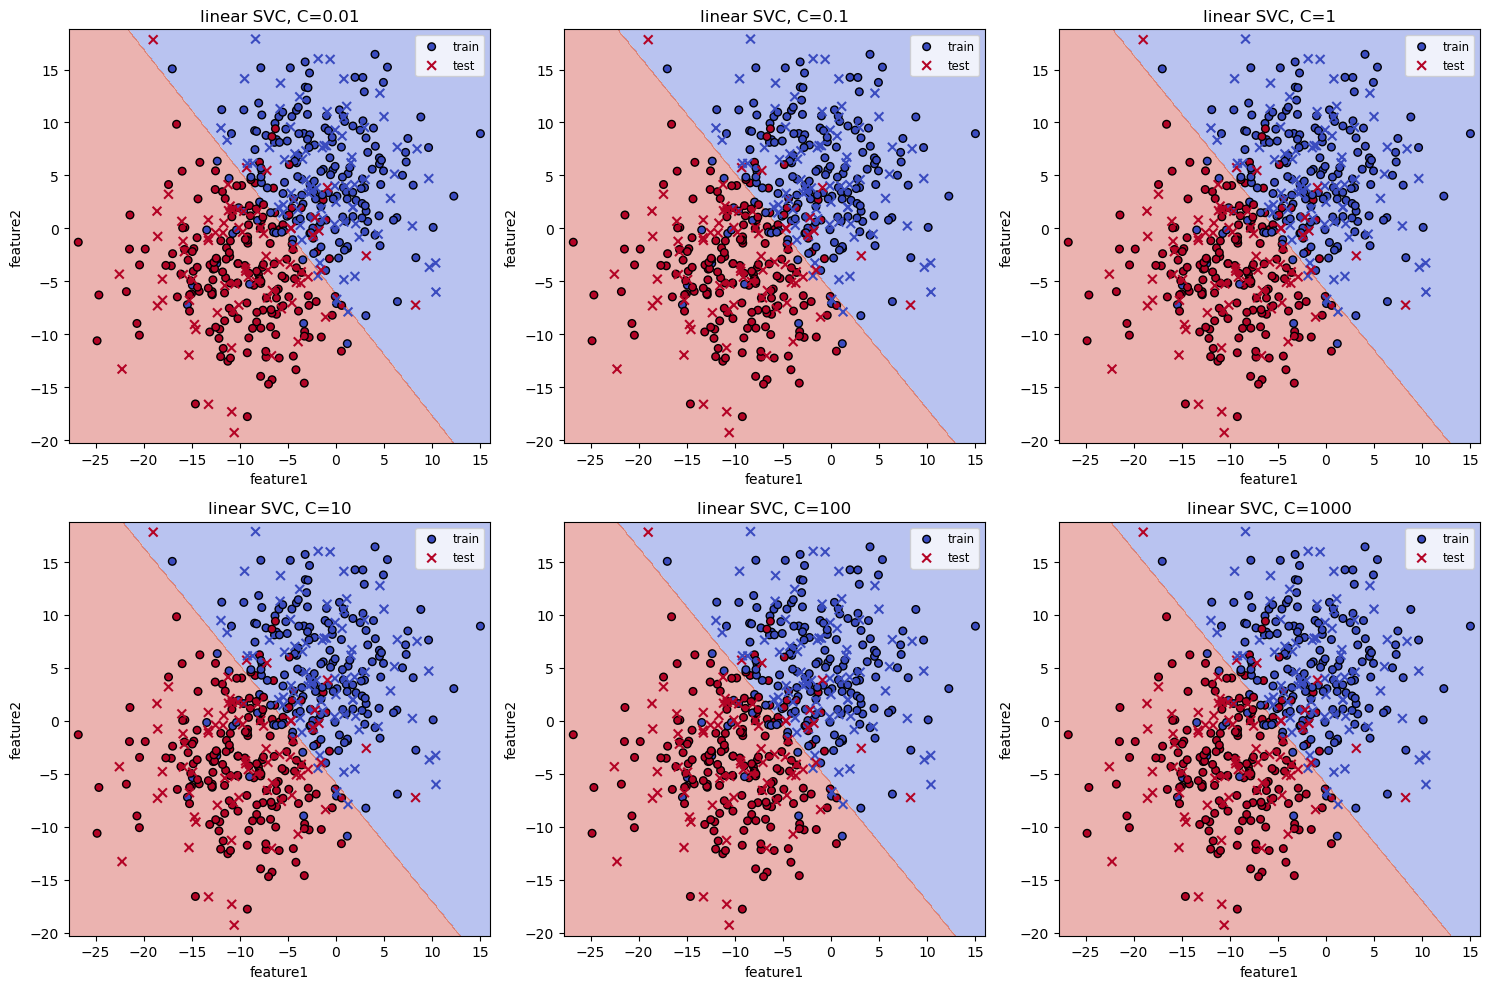

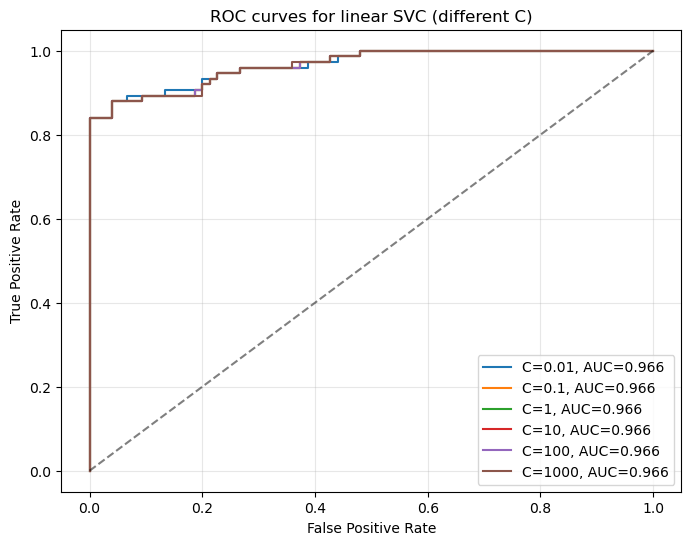

Best C by AUC: 0.01 (AUC=0.9664)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

C_list = [0.01, 0.1, 1, 10, 100, 1000]

X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

roc_results = []

for i, C in enumerate(C_list):
    clf = svm.SVC(kernel='linear', C=C, probability=False, random_state=0)
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax = axes[i]
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=30, label='train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=40, label='test')
    ax.set_title(f'linear SVC, C={C}')
    ax.set_xlabel('feature1'); ax.set_ylabel('feature2')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.legend(loc='upper right', fontsize='small')

    scores = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, scores)
    auc = metrics.auc(fpr, tpr)
    roc_results.append((C, fpr, tpr, auc))

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
for C, fpr, tpr, auc in roc_results:
    plt.plot(fpr, tpr, label=f'C={C}, AUC={auc:.3f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for linear SVC (different C)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

best_C, _, _, best_auc = max(roc_results, key=lambda item: item[3])
print(f'Best C by AUC: {best_C} (AUC={best_auc:.4f})')

### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

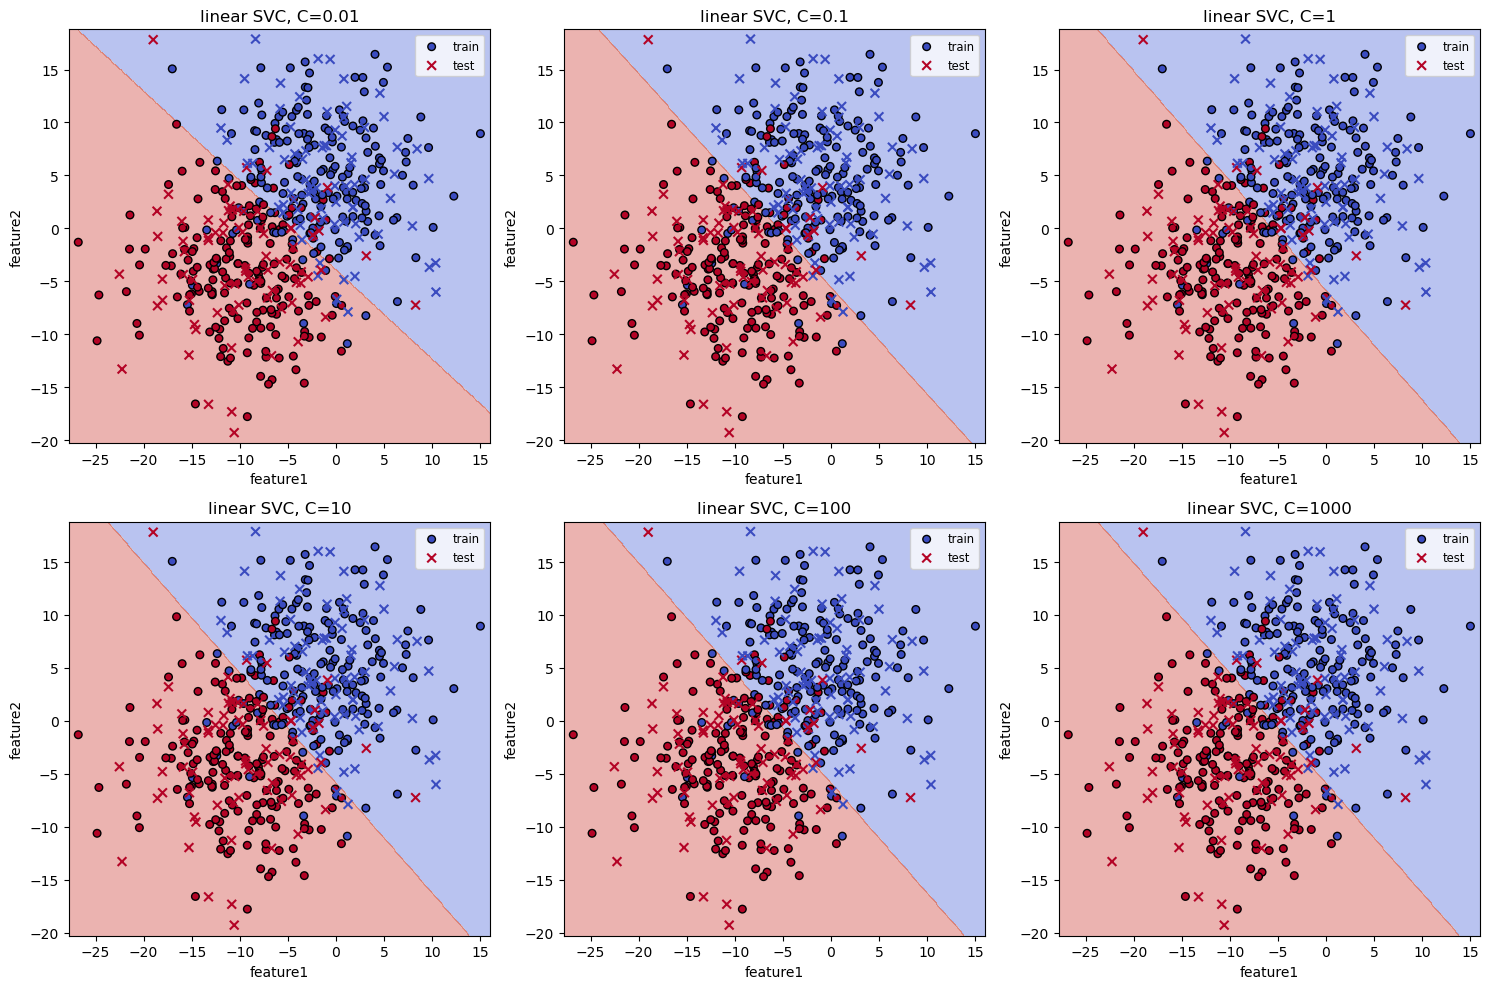

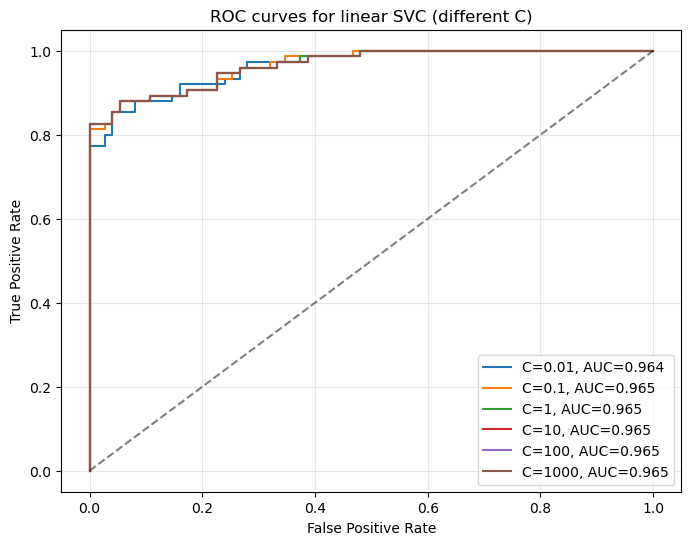

Best C by AUC: 0.1 (AUC=0.9653)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

C_list = [0.01, 0.1, 1, 10, 100, 1000]

X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

roc_results = []

for i, C in enumerate(C_list):
    clf = svm.LinearSVC(C=C, random_state=0)
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax = axes[i]
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=30, label='train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=40, label='test')
    ax.set_title(f'linear SVC, C={C}')
    ax.set_xlabel('feature1'); ax.set_ylabel('feature2')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.legend(loc='upper right', fontsize='small')

    scores = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, scores)
    auc = metrics.auc(fpr, tpr)
    roc_results.append((C, fpr, tpr, auc))

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
for C, fpr, tpr, auc in roc_results:
    plt.plot(fpr, tpr, label=f'C={C}, AUC={auc:.3f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for linear SVC (different C)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

best_C, _, _, best_auc = max(roc_results, key=lambda item: item[3])
print(f'Best C by AUC: {best_C} (AUC={best_auc:.4f})')

### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

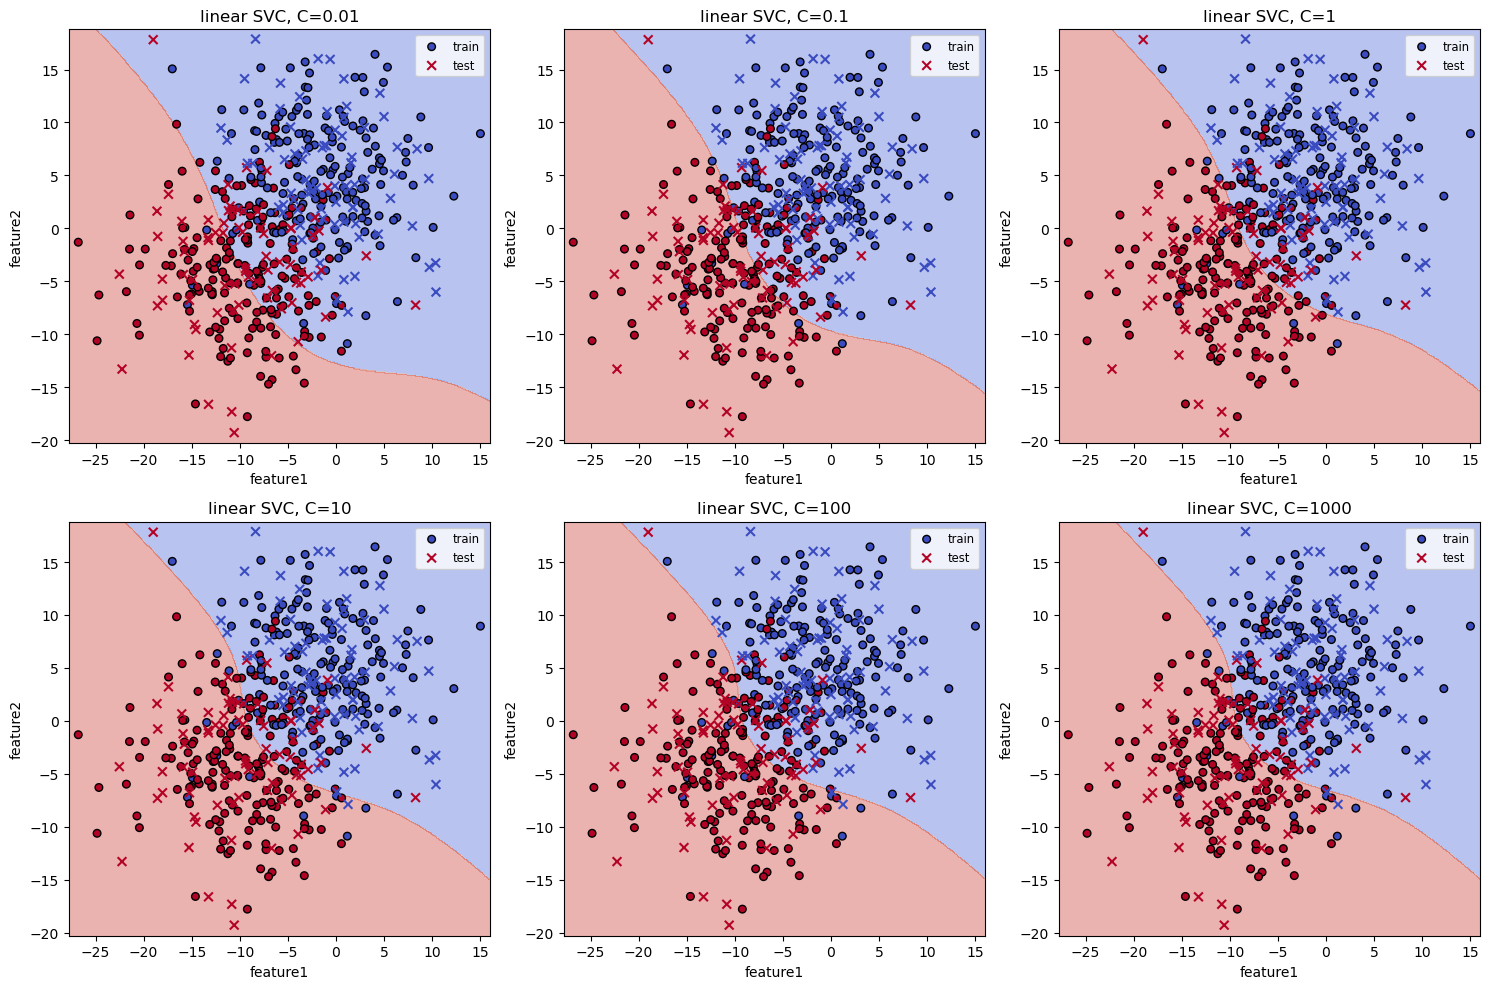

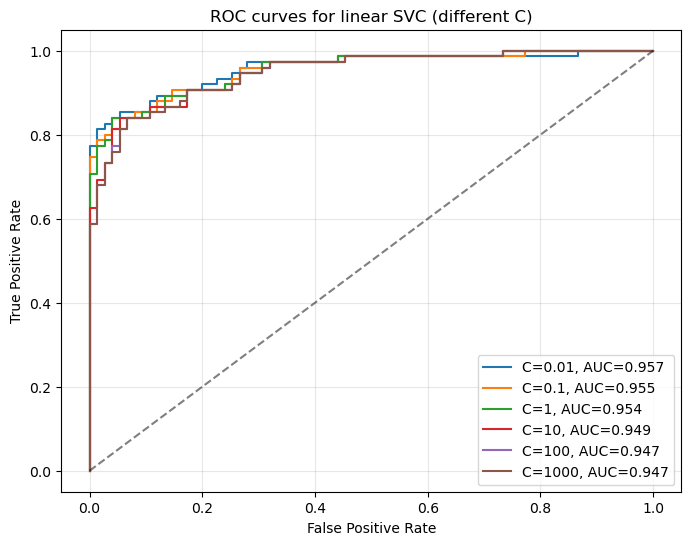

Best C by AUC: 0.01 (AUC=0.9573)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

C_list = [0.01, 0.1, 1, 10, 100, 1000]

X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

roc_results = []

for i, C in enumerate(C_list):
    clf = svm.SVC(kernel='poly', degree=3, C=C, probability=False, random_state=0)
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax = axes[i]
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=30, label='train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=40, label='test')
    ax.set_title(f'linear SVC, C={C}')
    ax.set_xlabel('feature1'); ax.set_ylabel('feature2')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.legend(loc='upper right', fontsize='small')

    scores = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, scores)
    auc = metrics.auc(fpr, tpr)
    roc_results.append((C, fpr, tpr, auc))

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
for C, fpr, tpr, auc in roc_results:
    plt.plot(fpr, tpr, label=f'C={C}, AUC={auc:.3f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for linear SVC (different C)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

best_C, _, _, best_auc = max(roc_results, key=lambda item: item[3])
print(f'Best C by AUC: {best_C} (AUC={best_auc:.4f})')

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

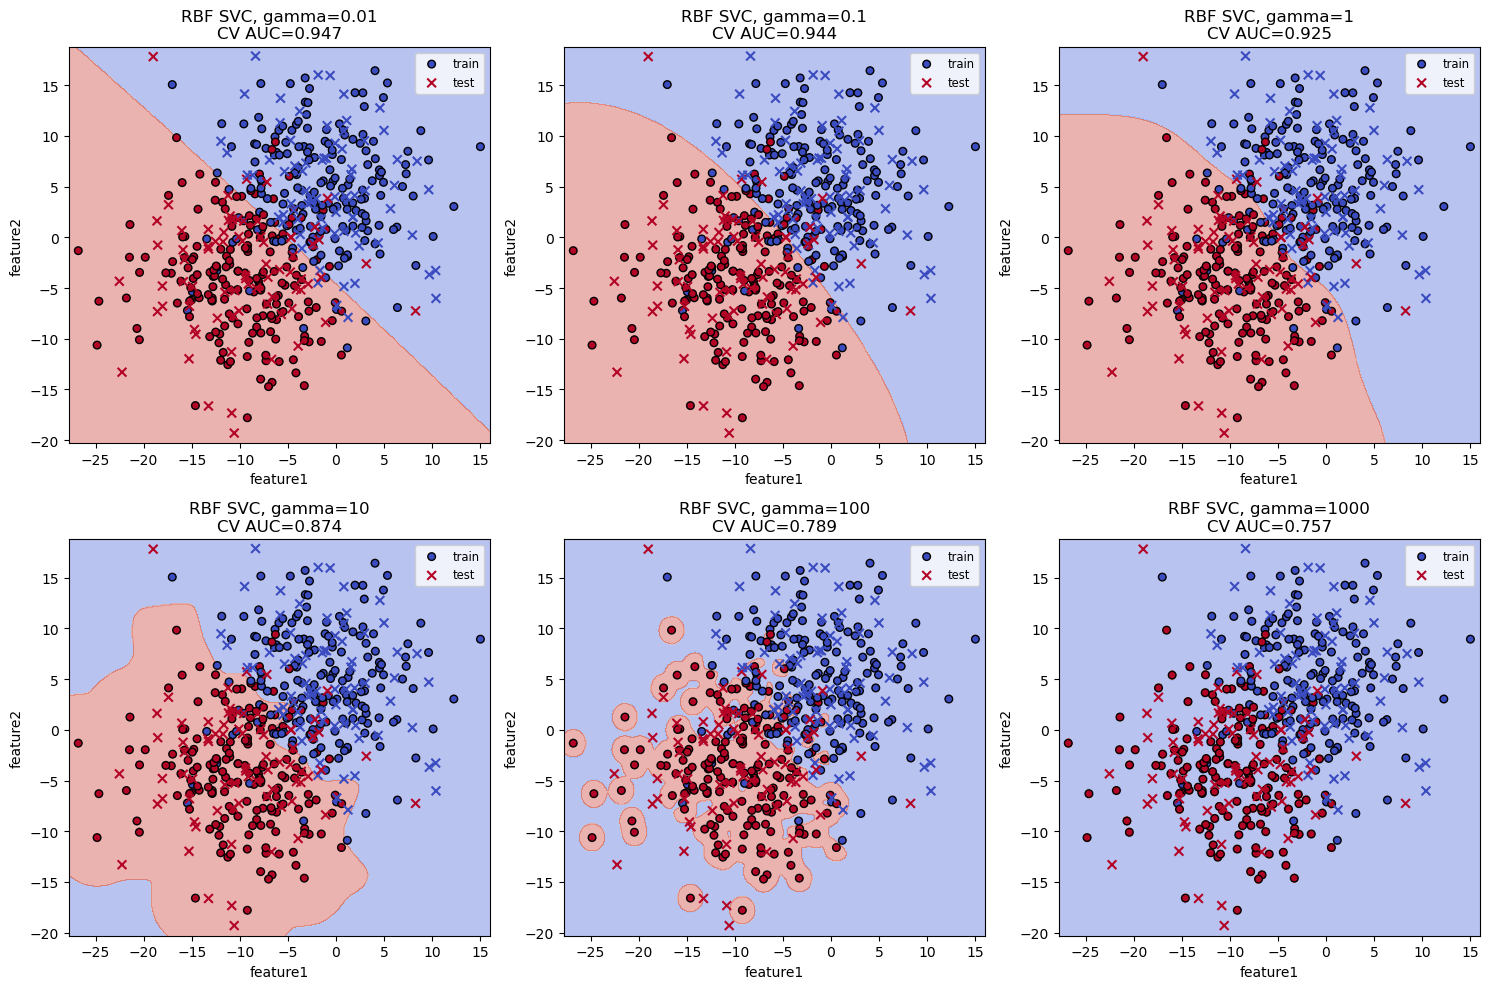

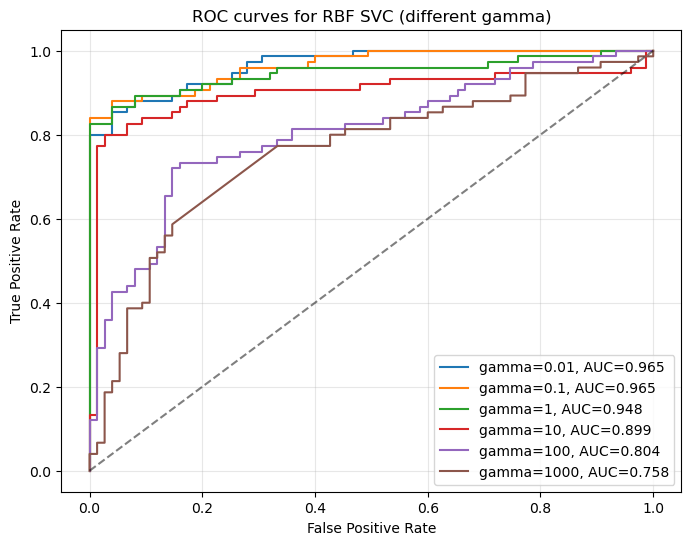

Best gamma by CV AUC: 0.01 (CV AUC=0.9466)
Best gamma by test AUC: 0.01 (test AUC=0.9650)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

gamma_list = [0.01, 0.1, 1, 10, 100, 1000]
C_fixed = 1.0

X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

roc_results = []
cv_aucs = []

for i, g in enumerate(gamma_list):
    pipe = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', C=C_fixed, gamma=g, probability=False, random_state=0))
    scores_cv = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='roc_auc')
    mean_cv_auc = scores_cv.mean()
    cv_aucs.append((g, mean_cv_auc))

    pipe.fit(X_train, y_train)
    Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax = axes[i]
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=30, label='train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=40, label='test')
    ax.set_title(f'RBF SVC, gamma={g}\nCV AUC={mean_cv_auc:.3f}')
    ax.set_xlabel('feature1'); ax.set_ylabel('feature2')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.legend(loc='upper right', fontsize='small')

    scores_test = pipe.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, scores_test)
    auc = metrics.auc(fpr, tpr)
    roc_results.append((g, fpr, tpr, auc))

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
for g, fpr, tpr, auc in roc_results:
    plt.plot(fpr, tpr, label=f'gamma={g}, AUC={auc:.3f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for RBF SVC (different gamma)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

best_gamma, best_cv_auc = max(cv_aucs, key=lambda x: x[1])
best_test_entry = max(roc_results, key=lambda x: x[3])
print(f'Best gamma by CV AUC: {best_gamma} (CV AUC={best_cv_auc:.4f})')
print(f'Best gamma by test AUC: {best_test_entry[0]} (test AUC={best_test_entry[3]:.4f})')
